#**RFM MODEL PROJECT**

---



**Content**
---
RFM (Recency – Frequency – Monetary): is a part of Marketing Analysis and is used to analyze customer value, thereby helping businesses analyze each group of customers they have. From there, there are marketing campaigns or special care.

**Context**
---
SuperStore Company is a **global retail company** - Global. So the company has many customers.
On the occasion of Christmas and New Year, the Marketing Department wants to **run marketing campaigns** to thank customers who have supported the company over the past time. As well as exploiting customers who have the potential to become loyal customers. However, the Marketing Department has not yet been able to group each customer this year because the data set is too large to be processed manually like in previous years, so we asked the Data Analysis Department to assist in implementing a classification problem. Segment each customer to deploy each marketing program suitable for each customer group.

The Marketing Director also proposed using **the RFM model**, but in the past when the company was small, the team could calculate and classify it themselves using Excel. Currently, the amount of data is too large, so we want the Data Department to build a flow to deploy Segmentation evaluation through Python programming.

##**1. Explore Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load data

df = pd.read_excel('/content/ecommerce retail.xlsx', sheet_name='ecommerce retail')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Check null & data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


We have a quick look at the first data set, the start date is 12/01/2010 and the end date is 12/09/2011. However, the Quantity and UnitPrice columns are not correct because the smallest value is still negative. We will normalize this column below.

In [ ]:
# CustomerID have null
# Quantity < 0
# Unit price < 0
# UK transactions have nulls
# --> The main columns that we should get: InvoiceNo, InvoiceDate, UnitPrice, CustomerID, (StockCode, Description)

In [ ]:
# Delete row have CustomerID null
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['CustomerID'])

In [ ]:
# Delete row have Transaction Cancle
df_copy['InvoiceNo'] = df_copy['InvoiceNo'].apply(str)
df_copy['CustomerID'] = df_copy['CustomerID'].apply(str)
df_copy = df_copy.drop(df_copy[df_copy['InvoiceNo'].str.contains("C")].index)

In [ ]:
# Convert UnitPrice and Quantity into positive values
df_copy = df_copy[df_copy['UnitPrice']>0]
df_copy =  df_copy[df_copy['Quantity']>0]

In [ ]:
# Replace UnitPrice = 0 using Mean
mean_price = df_copy['UnitPrice'].mean()
df_copy['UnitPrice'] = df_copy['UnitPrice'].mask(df_copy['UnitPrice'] == 0, mean_price)

In [ ]:
df_copy.info()
zero = df_copy.loc[df_copy['UnitPrice'] == 0].shape[0]
print(zero)

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB
0


In [ ]:
df_copy.describe()

,Quantity,InvoiceDate,UnitPrice
count,397884.000000,397884,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,179.331775,NaN,22.097877


##**2. Creating RFM score**

In [ ]:
# Calculated Recency Score
max_date = df_copy['InvoiceDate'].max() + pd.Timedelta(days=21)
Recency = df_copy.groupby('CustomerID')['InvoiceDate'].max().reset_index()
Recency['InvoiceDate'] = (max_date - Recency['InvoiceDate']) // pd.Timedelta(days=1)
Recency = Recency.rename(columns = {'InvoiceDate':'Recency'})

# Calculated Frequency Score
Frequency = df_copy.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
Frequency = Frequency.rename(columns = {'InvoiceNo':'Frequency'})

# Calculated Monetary Score
df_copy['SubTotal'] = df_copy['Quantity']*df_copy['UnitPrice']
Monetary = df_copy.groupby('CustomerID')['SubTotal'].sum().reset_index()
Monetary = Monetary.rename(columns = {'SubTotal':'Monetary'})

# Create RFM Table
merge_df = pd.merge(pd.merge( Recency, Frequency, on='CustomerID'), Monetary, on='CustomerID')
print(merge_df)

     CustomerID  Recency  Frequency  Monetary
0       12346.0      346          1  77183.60
1       12347.0       22          7   4310.00
2       12348.0       95          4   1797.24
3       12349.0       39          1   1757.55
4       12350.0      330          1    334.40
...         ...      ...        ...       ...
4333    18280.0      298          1    180.60
4334    18281.0      201          1     80.82
4335    18282.0       28          2    178.05
4336    18283.0       24         16   2094.88
4337    18287.0       63          3   1837.28

[4338 rows x 4 columns]


In [ ]:
# Calculated rfm scored for every customer
merge_df['R_score'] = pd.qcut(merge_df['Recency'], q=5, labels=list(range(5, 0, -1)))
merge_df['f_score'] = pd.qcut(merge_df['Frequency'].rank(method='first'), q=5, labels= range(1,6))
merge_df['M_score'] = pd.qcut(merge_df['Monetary'], q=5, labels=range(1,6))
merge_df['rfm_score'] = merge_df.apply(lambda row: str(row['R_score']) + str(row['f_score']) + str(row['M_score']), axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4338 non-null   object  
 1   Recency     4338 non-null   int64   
 2   Frequency   4338 non-null   int64   
 3   Monetary    4338 non-null   float64 
 4   R_score     4338 non-null   category
 5   f_score     4338 non-null   category
 6   M_score     4338 non-null   category
 7   rfm_score   4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 182.8+ KB


In [ ]:
# Create a table that will pair each customer with the appropriate segment.

df_rfm = pd.read_excel('/content/ecommerce retail.xlsx', sheet_name='Segmentation')

df_rfm['RFM Score'] = df_rfm['RFM Score'].str.split(',')
df_rfm = df_rfm.explode('RFM Score').reset_index(drop = True)
df_rfm['RFM Score'] = df_rfm['RFM Score'].str.strip()
df_rfm = df_rfm.rename(columns ={'RFM Score':'rfm_score'})

new_df=pd.merge(merge_df, df_rfm, how='left',on='rfm_score')
print(new_df)

     CustomerID  Recency  Frequency  Monetary R_score f_score M_score  \
0       12346.0      346          1  77183.60       1       1       5   
1       12347.0       22          7   4310.00       5       5       5   
2       12348.0       95          4   1797.24       2       4       4   
3       12349.0       39          1   1757.55       4       1       4   
4       12350.0      330          1    334.40       1       1       2   
...         ...      ...        ...       ...     ...     ...     ...   
4333    18280.0      298          1    180.60       1       2       1   
4334    18281.0      201          1     80.82       1       2       1   
4335    18282.0       28          2    178.05       5       3       1   
4336    18283.0       24         16   2094.88       5       5       5   
4337    18287.0       63          3   1837.28       3       4       4   

     rfm_score             Segment  
0          115    Cannot Lose Them  
1          555           Champions  
2          2

##**3. Visualizations and Insights**

### **Overview**

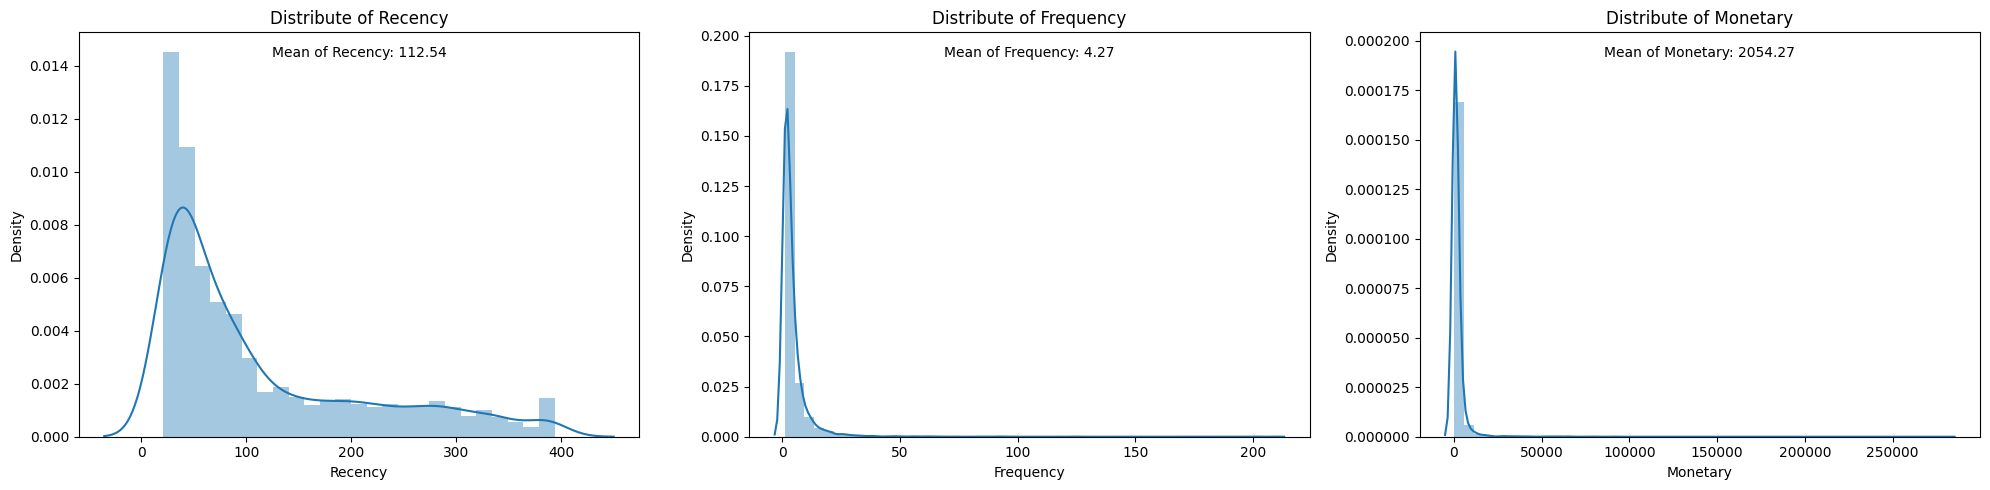

In [ ]:
# Overview
col_name = ['Recency','Frequency','Monetary']
fig,axes = plt.subplots(1,3, figsize=(20,5))

for i, col in enumerate(col_name):
  sns.distplot(new_df[col], ax =axes[i])
  axes[i].set_title('Distribute of %s' %col)
  mean_value = new_df[col].mean()
  axes[i].text(0.5, 0.95, f'Mean of {col}: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
plt.tight_layout()
plt.show()


- Of the three indicators, we see that Recency is the indicator that does not have too much difference between customer segments. **112 days** is the average value from the last purchase to the reporting date, and we see in the Recency chart that most new customers only made a purchase **21-100 days** before the reporting date. That shows the large purchasing power of customers in the last months of 2011.

- In the remaining two indicators, there will be quite a **big difference between customer segments** because we observe that the two Monetary and Frequency charts are quite left-skewed.

In [ ]:
from ctypes import alignment
import plotly.express as px
# Segmentation by treemap

# Set up color
segment_colors = {
    'Champions': '#0450b4',
    'Loyal': '#046dc8',
    'Potential Loyalist': '#1184a7',
    'New Customers': '#15a2a2',
    'Promising': '#6fb1a0',
    'Need Attention': '#b4418e',
    'About To Sleep': '#d94a8c',
    'At Risk': '#ea515f',
    'Cannot Lose Them': '#fe7434',
    'Hibernating customers': '#fea802',
    'Lost customers': '#ffdd00',
}


# Summarize segment data
total_customer = new_df['CustomerID'].count()
segment_df = new_df.groupby('Segment').agg({
    "Recency":"mean",
    "Frequency":"mean",
    "Monetary":"mean",
})
segment_df = segment_df.rename(columns = {'Recency':'avg_recency', 'Frequency':'avg_frequency', 'Monetary':'avg_monetary'})
segment_df['sum_monetary'] = new_df.groupby('Segment')['Monetary'].sum()
segment_df['percent_monetary'] = round((segment_df['sum_monetary']*100)/segment_df['sum_monetary'].sum(),2)

segment_df['count_customer'] = new_df.groupby('Segment')['CustomerID'].count()
segment_df['percent_customer'] = round((segment_df['count_customer']*100)/total_customer, 2)
segment_df.reset_index(inplace=True)

# Treemap
fig = px.treemap(segment_df[['Segment','count_customer','percent_customer']], path=['Segment'], values='count_customer', hover_data=['count_customer', 'percent_customer'], color='Segment', color_discrete_map=segment_colors)
fig.update_layout(title_text="Treemap analyze customer segmentation", title_x=0.5,title_y=0.95)
fig.show()

**Current situation of customer segmentation in the company:**
- The **Champions and Hibernating customer segments account for the largest proportion**, respectively 19.36% and 15.81% of the total 4339 customers.

- The **lowest are the Promising and Cannot lose them** segments with the total proportion of the two segments being only 5% of the total.

<br><br>

---
Overall, at the end of 2011, **the business situation of the enterprise was quite good with a large number of customers in the Champions, Loyal, Potential Loyal segments.** These are the loyal segments and bring the highest value to the enterprise. AND businesses are investing in these customer segments<br><br>

However, the customer segments Hibernating (hibernation), About to sleep, At risk (risk) and Lost customer also account for a high proportion as we see that this group accounts for **approximately 40**% of the total number of customers. This is a group of customers who have purchased the company's products but have recently or gradually disappeared for a long time. **Shows 2 things**:

- Businesses **have neglected implementing effective care programs for customers who haven't made purchases in a while**, instead prioritizing customer segments that provide high value

- The company's products have gone through a period of "losing form" or have become extremely attractive as before, also known as out of trend with the above customers, causing them to leave.
<br> <br>

Moreover, we see that the company's approach to new and potential customers such as the two customer segments **New Customer and Promising is not good**. This will make it difficult for them to expand their current customer base and gradually lose opportunities in the new market that is constantly developing.

<br><br>

### **Segment Charateristics**

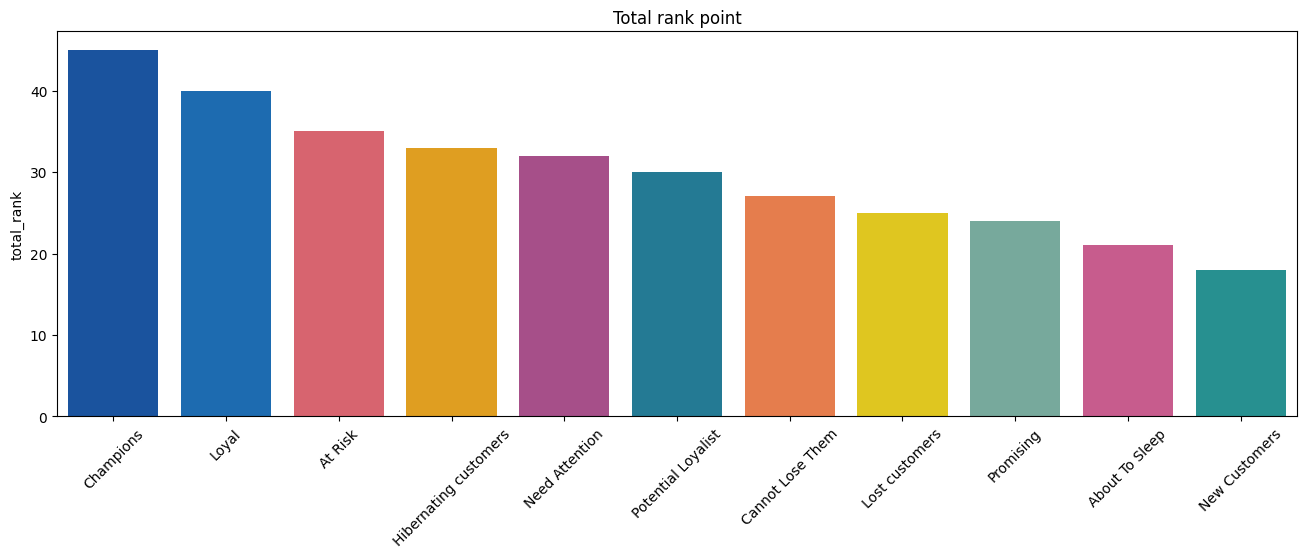

In [ ]:
# Calculate point each segment
segment_df['rank_percent_monetary'] = segment_df['percent_monetary'].rank(ascending=True)
segment_df['rank_percent_customer'] = segment_df['percent_customer'].rank(ascending=True)
segment_df['rank_avg_recency'] = segment_df['avg_recency'].rank(ascending=False)
segment_df['rank_avg_frequency'] = segment_df['avg_recency'].rank(ascending=True)
segment_df['rank_avg_monetary'] = segment_df['avg_monetary'].rank(ascending=True)
segment_df['total_rank'] = segment_df['rank_percent_monetary'] + segment_df['rank_percent_customer'] + segment_df['rank_avg_recency'] +  segment_df['rank_avg_frequency'] + segment_df['rank_avg_monetary']
segment_df = segment_df.sort_values(by='total_rank', ascending=False)

# Bar chart show total point
plt.figure(figsize=(16,5))
sns.barplot(x=segment_df['Segment'],y=segment_df['total_rank'], data=segment_df, palette=segment_colors, errorbar=None, order =segment_df['Segment'])
plt.gca().set_xlabel('')
plt.title('Total rank point')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(segment_df)

                  Segment  avg_recency  avg_frequency  avg_monetary  \
3               Champions    31.460714      12.092857   6712.974381   
6                   Loyal    57.014019       5.271028   2340.967173   
1                 At Risk   165.395631       3.747573   1775.252357   
4   Hibernating customers   170.181951       1.556041    410.587194   
7          Need Attention    54.095745       3.099291   1650.706954   
9      Potential Loyalist    47.148936       2.522459    542.596383   
2        Cannot Lose Them   255.130435       2.358696   2231.790435   
5          Lost customers   295.641393       1.065574    200.857480   
10              Promising    45.330882       1.323529    889.936397   
0          About To Sleep   107.530466       1.279570    276.456165   
8           New Customers    48.656827       1.070111    223.522804   

    sum_monetary  percent_monetary  count_customer  percent_customer  \
3    5638898.480             63.28             840             19.36   
6  

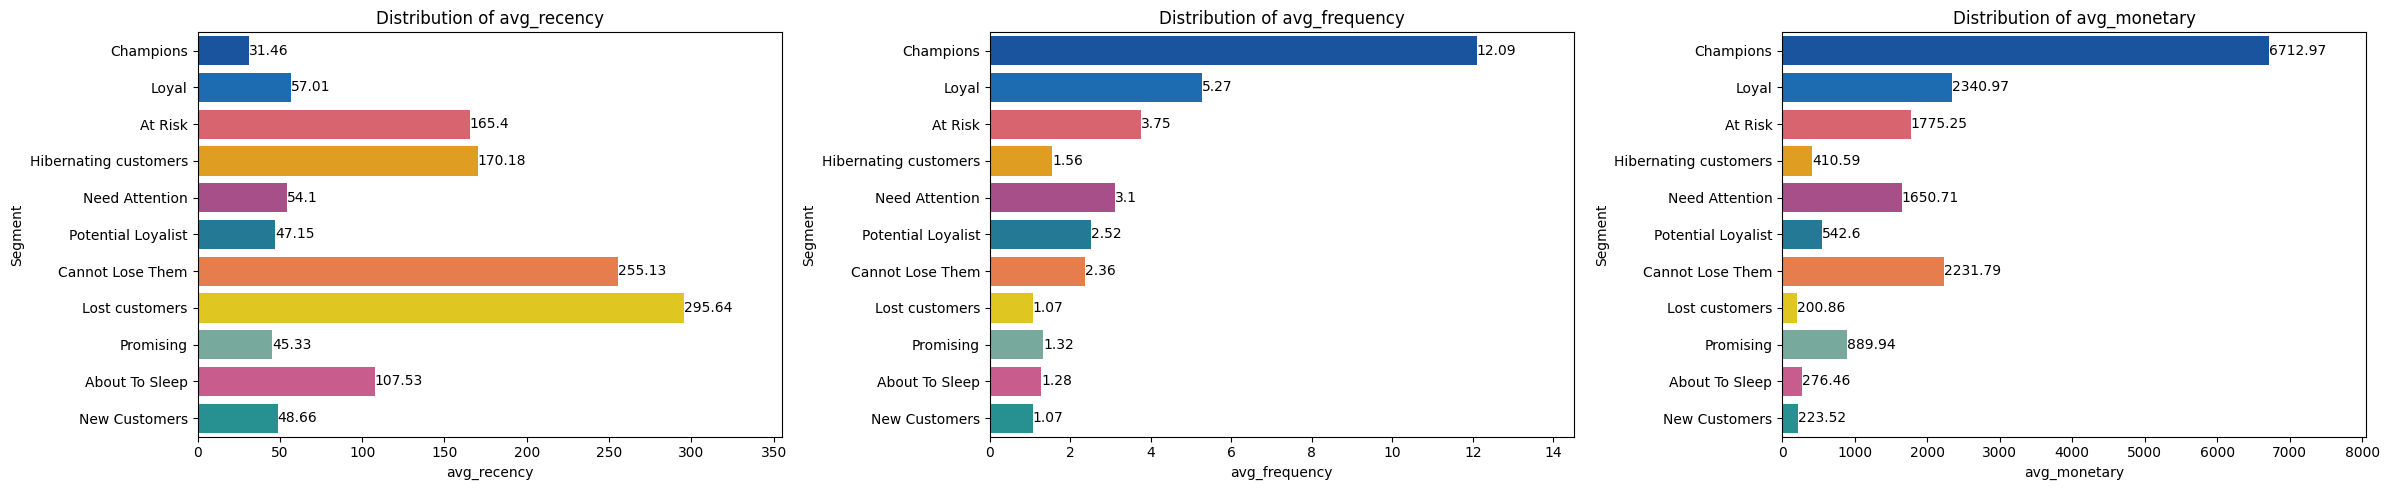

In [ ]:
# Distribution of averate each segment
col_name = ['avg_recency', 'avg_frequency','avg_monetary']

segments_to_exclude = ['']
fig,axes = plt.subplots(1,3, figsize=(24,5))

for i, col in enumerate(col_name):
    filtered_df = segment_df[~segment_df['Segment'].isin(segments_to_exclude)]
    sns.barplot(x=segment_df[col],y='Segment', data=filtered_df, palette=segment_colors, orient='h', errorbar=None, order =segment_df['Segment'], ax =axes[i])
    axes[i].set_title('Distribution of %s' % col)
    for index, value in enumerate(segment_df[col]):
      axes[i].text(value, index, str(round(value, 2)), ha='left', va='center')
    axes[i].set_xlim(0, segment_df[col].max() * 1.2)

plt.tight_layout()
plt.show()

We use the **ranking method** to rate each customer segment on the following factors: total value, total number of customers, average monetary value, average frequency value and average recency value. Then use that ranking to calculate a score for each customer segment on a scale of 1-11 to evaluate the importance and determine the nature of the company's current customer segments.
- The customer segments **Champions and Loyal** will be the two segments that the customer appreciation marketing campaign should target because these are the most loyal and valuable customers for the company with an average total value of **6712.97 and 2340.97** respectively and the most frequent purchases with **12 average orders for Champion and 5 orders for Loyal customers** . As we can see in the chart above, the two segments have average Recency, Frequency and Monetary indexes that are superior to the other segments. The total_rank score is also the highest, showing the current importance of these two customer files to the company. <br><br>
- The following segments, if calculated by total_rank score, such as **At risk, Hibernating, Need Attention, Potential Loyalist and Cannot lose them** are high potential segments that need attention and strong enough strategies to pull them up to more valuable segments. These are the segments that we should focus on now to turn them into loyal customers.<br><br>
- The customer segments ranked at the bottom such as **Lost customer, Promising, About to sleep and New customer** are medium - low potential segments because firstly, the number of customers in these segments of the company is quite low, with weak purchasing power or have left the business. The reason for the two Promising and New customer segments is that they have just learned about the company, and are still in the experience stage. As for the two segments Lost customer and About to sleep, the reason is because they are no longer "interested" in the products, and seem to have almost left the company.

### **Which segments have the best potential to convert loyal customers?**

As analyzed above, the segments **At risk, Hibernating, Need Attention, Potential Loyalist and Cannot lose them** are high potential segments that need attention to convert them into Loyal customers. So what to pay attention to, what marketing programs to use as well as which segment has the highest potential to convert into Loyal customers will have the following answer.

Text(0.5, 1.0, 'Percent Growth by Segment')

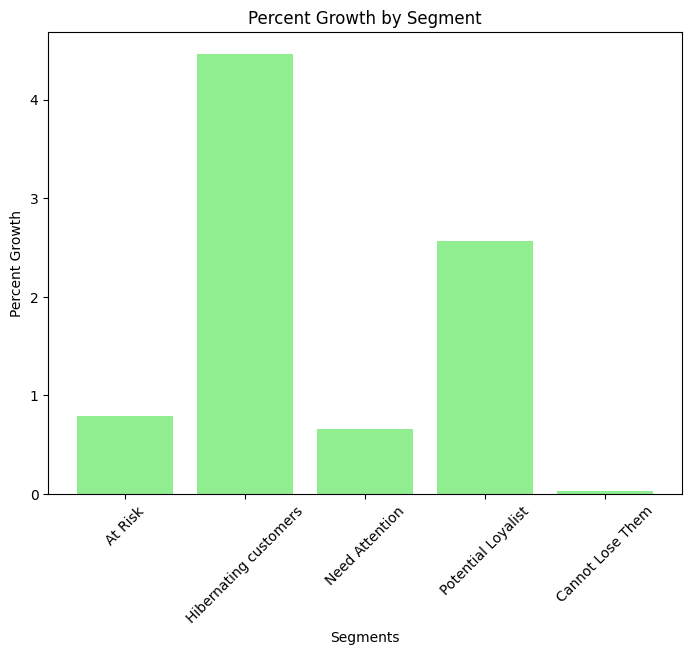

In [ ]:
import math
total_revenue=segment_df['sum_monetary'].sum()

def get_customer(segment):
    num_customer = round(0.3 * (new_df['Segment'] == segment).sum(),0)
    delta_growth =  segment_df[segment_df['Segment'] == 'Loyal']['avg_monetary'].sum()- segment_df[segment_df['Segment'] == segment]['avg_monetary'].sum()
    growth_revenue = num_customer*delta_growth
    return growth_revenue

def growth(total_revenue, growth_revenue):
    total_revenue=segment_df['sum_monetary'].sum()
    percent_growth = growth_revenue*100/total_revenue
    return percent_growth

# Calculate revenue growth value from each segment
segments = ['At Risk', 'Hibernating customers', 'Need Attention', 'Potential Loyalist', 'Cannot Lose Them']
growth_revenues = [get_customer(segment) for segment in segments]

# Calculate %revenue growth value from each segment
total_revenue = segment_df['sum_monetary'].sum()
percent_growths = [growth(total_revenue, growth_revenue) for growth_revenue in growth_revenues]

# Draw chart
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.bar(segments, percent_growths, color='lightgreen')
plt.xlabel('Segments')
plt.ylabel('Percent Growth')
plt.xticks(rotation=45)
plt.title('Percent Growth by Segment')



- The chart above shows the growth of revenue if the company can **convert 30% of the customer files** of segments such as At risk, Hibernating, Need Attention, Potential Loyalist and Cannot lose them into the Loyal customer segment. We see that with **more than 4% and nearly 3% growth** for total revenue if the two segments **Hibernating and Potential Loyalis** can be converted to Loyal, it shows that the above two segments are extremely potential and need to be focused on the most in the upcoming campaign.

- **With the Hibernating segment**, they are customers who have not purchased for a long time but have previously accessed the company's products with an average purchasing power of 1.56 orders and an average value of 410.59. Therefore, campaigns aimed at this customer segment can somehow attract them to buy again as soon as possible, such as special promotions for customers who have returned to buy after a long time. In addition, it is necessary to find out the reasons why they leave the company to improve the product or service to attract them to buy again.
- **With the Potential Loyalist segment**, they are recent buyers quite often (average 2.52 purchases and the average last day of purchase is 47 days). However, their purchasing power is not strong, as shown by the low order value of only $542.6. Therefore, campaigns to convert this customer segment can increase the value of each of their purchases, such as applying the more you buy, the cheaper it is or applying a spending threshold to encourage them to buy more. In addition, it is possible to promote higher value products to this customer segment so that they can spend more.

### **How is marketing stragery to Champions and Loyal segments?**

We already know that the main target for the upcoming loyalty marketing plan is customers in the two main segments, Champions and Loyal. However, to be able to design customer loyalty programs that require more than that, we cannot give the same gratitude to all customers in these two segments. Therefore, to support the gratitude of these loyal customers more specifically, customer segmentation has been carried out.

With the output goal of identifying additional Gold, Silver and Bronze customer files, the company will further evaluate the characteristics of these two customer segments, optimizing upcoming customer loyalty programs.

          Recency     Monetary  Frequency
Label                                    
Bronze  46.137821  1716.480385   4.509615
Gold    34.502304  7962.034562  13.728111
Silver  39.170501  5923.584641  10.863329


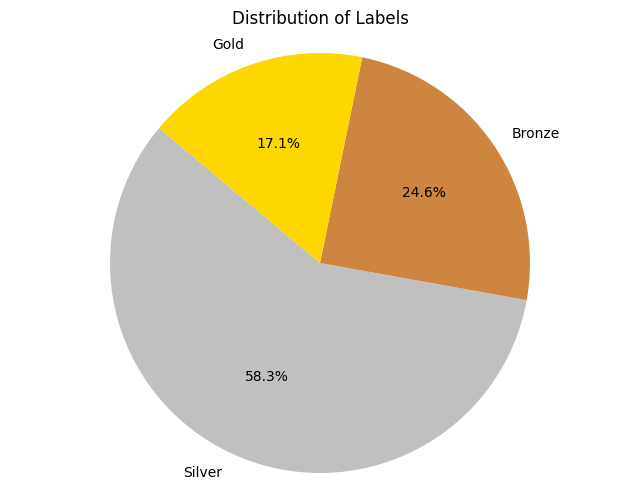

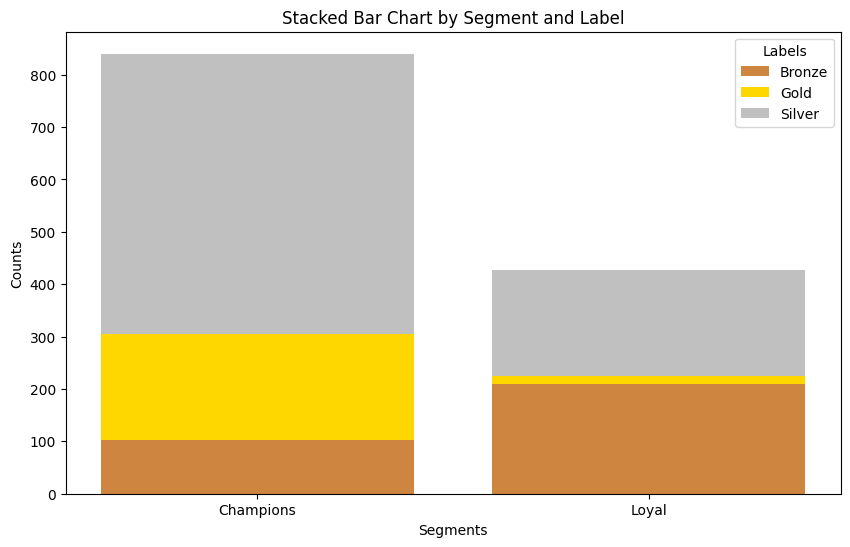

In [ ]:
label_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

segments_to_include = ['Champions', 'Loyal']
segment_detail= new_df[new_df['Segment'].isin(segments_to_include)]
segment_detail['R_score'] = pd.qcut(segment_detail['Recency'], q=3, labels=list(range(3, 0, -1)))
segment_detail['f_score'] = pd.qcut(segment_detail['Frequency'].rank(method='first'), q=3, labels= range(1,4))
segment_detail['M_score'] = pd.qcut(segment_detail['Monetary'], q=3, labels=range(1,4))
segment_detail['rfm_score'] = segment_detail.apply(lambda row: str(row['R_score']) + str(row['f_score']) + str(row['M_score']), axis=1)

labels = []

for value in segment_detail['rfm_score']:
    if str(value).count('3') == 2:
        labels.append('Gold')
    elif str(value).count('1')==2:
        labels.append('Bronze')
    else:
      labels.append('Silver')

# Add new conlumn label into Data Frame
segment_detail['Label'] = labels
label_loyal_customer = segment_detail.groupby('Label').agg({
    "Recency" : "mean",
    "Monetary" : "mean",
    "Frequency" : "mean",
})
print(label_loyal_customer)

# Calculate the number of occurrences of each label
label_counts = segment_detail['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[label_colors[label] for label in label_counts.index])
plt.title('Distribution of Labels')
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

# Create a sub-DataFrame containing the occurrence counts of each label by segment
label_counts_by_segment = segment_detail.groupby(['Segment', 'Label']).size().unstack(fill_value=0)

# Draw a stacked column chart
plt.figure(figsize=(10, 6))
bottom_values = np.zeros(len(segment_detail['Segment'].unique()))

for label in label_counts_by_segment.columns:
    plt.bar(label_counts_by_segment.index, label_counts_by_segment[label], label=label, bottom=bottom_values, color=label_colors[label])
    bottom_values += label_counts_by_segment[label]

plt.xlabel('Segments')
plt.ylabel('Counts')
plt.title('Stacked Bar Chart by Segment and Label')
plt.legend(title='Labels')
plt.show()

- After labeling and classifying three more customer groups to reward in the Champions and Loyal groups. We observe that only **17.1% of customers reach the Gold level** - the best gift or incentive level in the upcoming customer reward period with a purchase amount of up to nearly 8000 and approximately 13 purchases.

- **Next, accounting for more than half are Silver customers** with a purchase value of approximately 6000 bold text with an average of 10 purchases. And finally **Bronze level accounts for nearly 1/4** with an average purchase value of 1700 and more than 4 purchases.

- In the stacked column chart below, we see that the majority of Gold customers will belong to the Champions segment and this is also the most VIP, most loyal and best customer file of our company at present.